<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-libraries" data-toc-modified-id="Load-the-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load the libraries</a></span></li><li><span><a href="#Visualize-the-image" data-toc-modified-id="Visualize-the-image-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Visualize the image</a></span></li><li><span><a href="#Local-Binary-Patterns-(LBP)" data-toc-modified-id="Local-Binary-Patterns-(LBP)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Local Binary Patterns (LBP)</a></span><ul class="toc-item"><li><span><a href="#Visualize-the-values-obtained-from-LBP" data-toc-modified-id="Visualize-the-values-obtained-from-LBP-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Visualize the values obtained from LBP</a></span></li></ul></li><li><span><a href="#Notes" data-toc-modified-id="Notes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Notes</a></span></li></ul></div>

# Load the libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Visualize the image

In [3]:
img = cv2.imread("images/cv_test_images_1.png")

<img src="images/cv_test_images_1.png" width=1000 height=600 />

# Local Binary Patterns (LBP)

In [36]:
def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value

def lbp_calculated_pixel(img, x, y):
    '''
     64 | 128 |   1
    ----------------
     32 |   0 |   2
    ----------------
     16 |   8 |   4    
    '''    
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y+1))     # top_right
    val_ar.append(get_pixel(img, center, x, y+1))       # right
    val_ar.append(get_pixel(img, center, x+1, y+1))     # bottom_right
    val_ar.append(get_pixel(img, center, x+1, y))       # bottom
    val_ar.append(get_pixel(img, center, x+1, y-1))     # bottom_left
    val_ar.append(get_pixel(img, center, x, y-1))       # left
    val_ar.append(get_pixel(img, center, x-1, y-1))     # top_left
    val_ar.append(get_pixel(img, center, x-1, y))       # top
    
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val    
    

#     image_file = 'lenna.jpg'
img_bgr = img
height, width, channel = img_bgr.shape
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

img_lbp = np.zeros((height, width,3), np.uint8)
for i in range(0, height):
    for j in range(0, width):
         img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

LBP Program is finished


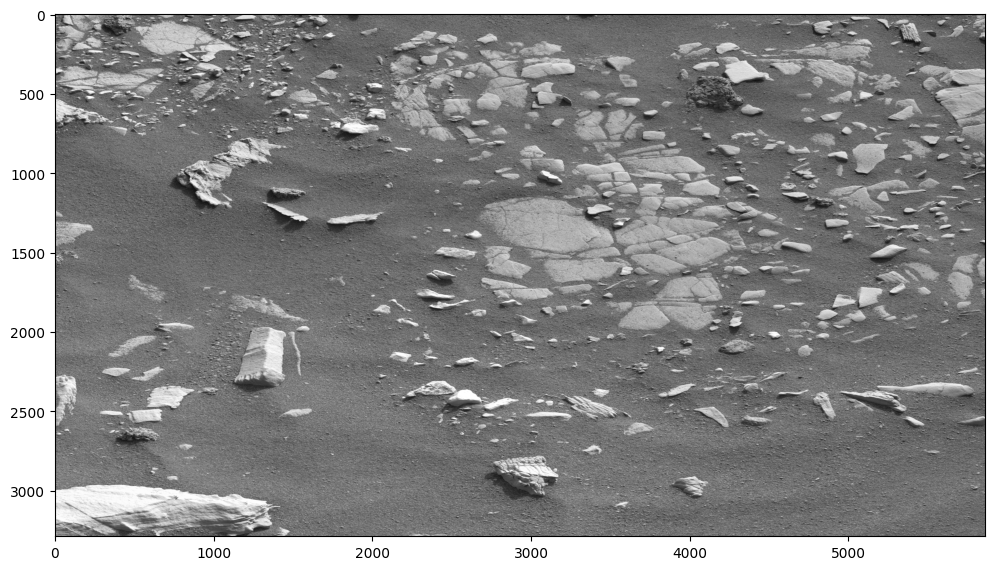

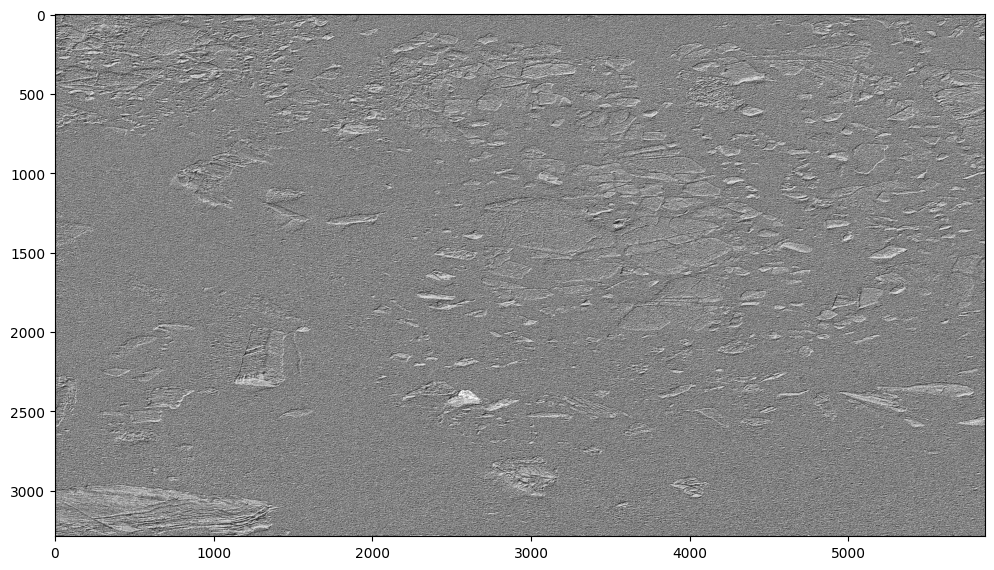

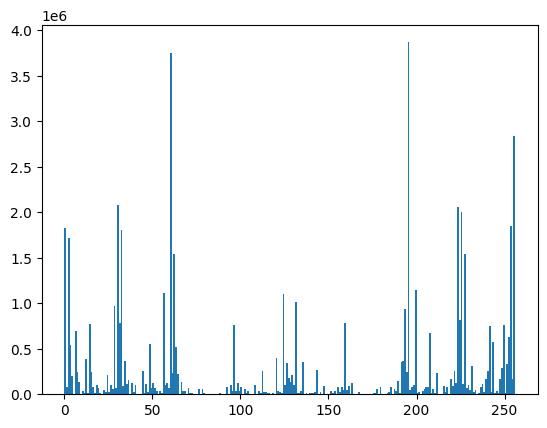

In [38]:
plt.figure(figsize=(12,10))
plt.imshow(img_gray, cmap ="gray")
plt.show()
plt.figure(figsize=(12,10))
plt.imshow(img_lbp, cmap ="gray")
plt.show()
plt.hist(img_lbp.ravel(),256,[0,256])
plt.show()

## Visualize the values obtained from LBP

In [39]:
values =[]
for i in range(img_lbp.shape[0]):
    for j in range(img_lbp.shape[1]):
        values.append(img_lbp[i][j])

In [40]:
print(len(values))

19267680


In [41]:
np.unique(values, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

# Notes

To evaluate tree textural information, different common texture
algorithms were applied and compared in this study. They
included local statistical measures (contrast, energy, entropy,
homogeneity, and variance), co-occurrence matrix based techniques (also using the same contrast, energy, entropy, homogeneity, and variance), and edge detection algorithms (Sobel,
Kirsch, and Canny).

You can compute the following first-order texture metrics:

- Data Range
- Mean
- Variance
- Entropy
- Skewness

Texture Segmentation: In image data, we can find out the difference between the image areas in the context of the texture. By texture segmentation, we find different boundaries of the different textures in the image. We can also say that, in texture segmentation, we compare different areas of the images if the textual characteristics are different and define them by assigning the boundaries.

So the algorithm again: Take a sliding window; compute the Haralick features on the window. Or run Gabor filters on the image. Use the Haralick features or the results of the Gabor filter for the current pixel as input vector for an SVM, it will give you the texture class for the current pixel.